In [1]:
#Import libraries
import csv
import pygeocoder
import pandas as pd
from pygeocoder import Geocoder
import numpy as np

In [2]:
# for reversegeocoding
from geopy.geocoders import Nominatim

In [3]:
#data cleaning part
#define removing files

remove_from = 2
remove_to = 8

In [4]:
#remove files

with open("StatenIsland2008.csv", "rb") as fp_in, open("ColumnDel.csv", "wb") as fp_out:
    reader = csv.reader(fp_in, delimiter=",")
    writer = csv.writer(fp_out, delimiter=",")
    for row in reader:
        del row[remove_from:remove_to]
        writer.writerow(row)

In [5]:
#remove '0' sale values

df = pd.read_csv('ColumnDel.csv')
#df1 = df1[df.sale_price != 0]
df1 = df[df['sale_price'] > 0]

In [6]:
print df1

      borough       neighborhood                  address apartment_number  \
0           5           ANNADALE          4730 AMBOY ROAD              NaN   
5           5           ANNADALE          99 EAGAN AVENUE              NaN   
7           5           ANNADALE          63 EAGAN AVENUE              NaN   
8           5           ANNADALE           5 EAGAN AVENUE              NaN   
9           5           ANNADALE        1094 ARDEN AVENUE              NaN   
10          5           ANNADALE           53 BARB STREET              NaN   
11          5           ANNADALE           51 BARB STREET              NaN   
12          5           ANNADALE           45 BARB STREET              NaN   
13          5           ANNADALE        40 ENDVIEW STREET              NaN   
14          5           ANNADALE        52 ENDVIEW STREET              NaN   
16          5           ANNADALE      58 JEANNETTE AVENUE              NaN   
19          5           ANNADALE       27 LORRAINE AVENUE       

In [7]:
#write to new file
df1.to_csv('c.csv', index=False, header=True)

In [8]:
df2 = pd.read_csv('c.csv')

In [9]:
#define list and adress column
ad= df2.address
c = []

In [12]:
#retrieve lat,long data
for an in ad:
    geolocator = Nominatim()
    location = geolocator.geocode(an)
    if location is not None and location.longitude is not None:
        c.append((location.latitude, location.longitude))

In [13]:
locations = pd.DataFrame(c)

In [14]:
#combine lat,long with base data
test3 = pd.concat([locations, df2], axis=1)
test3 

,0,1,borough,neighborhood,address,apartment_number,zip_code,residential_units,commmercial_units,total_units,land_sq_feet,gross_sq_feet,year_built,tax_class_time_sale,build_class_time_sale,sale_price,sale_date,serialid
0,40.569434,-74.124179,5,ANNADALE,4730 AMBOY ROAD,NaN,10312,1,0,1,3149,1110,2002,1,A5,450000,2/4/2011,212800
1,40.538825,-74.172441,5,ANNADALE,99 EAGAN AVENUE,NaN,10312,1,0,1,1845,1854,1986,1,A5,338000,12/19/2011,212805
2,40.539646,-74.172939,5,ANNADALE,63 EAGAN AVENUE,NaN,10312,1,0,1,2358,1854,1986,1,A5,180455,11/25/2011,212807
3,40.540974,-74.173756,5,ANNADALE,5 EAGAN AVENUE,NaN,10312,1,0,1,1508,1521,1986,1,A5,345000,5/19/2011,212808
4,26.397660,-81.422905,5,ANNADALE,1094 ARDEN AVENUE,NaN,10312,1,0,1,4200,1536,1970,1,A1,410000,7/28/2011,212809
5,32.742620,-100.387931,5,ANNADALE,53 BARB STREET,NaN,10312,1,0,1,1585,1661,2004,1,A5,414000,4/5/2011,212810
6,32.742620,-100.387931,5,ANNADALE,51 BARB STREET,NaN,10312,1,0,1,1585,1661,2004,1,A5,410000,6/10/2011,212811
7,32.742620,-100.387931,5,ANNADALE,45 BARB STREET,NaN,10312,1,0,1,1585,1661,2004,1,A5,415000,1/14/2011,212812
8,40.541683,-74.175665,5,ANNADALE,40 ENDVIEW STREET,NaN,10312,1,0,1,1648,1816,2003,1,A5,426000,2/10/2011,212813
9,40.541435,-74.175532,5,ANNADALE,52 ENDVIEW STREET,NaN,10312,1,0,1,1648,1816,2003,1,A5,380000,11/10/2011,212814


In [15]:
#Landfill area location in Staten Island this is fized location

test3['parklat'] = '40.570923'
test3['parklon'] = '-74.177960'

#test3['parklat'] = p.Series(np.random.randn('40.570923'), index=df1.index)
#40.570923, -74.177960

In [17]:
test3

,0,1,borough,neighborhood,address,apartment_number,zip_code,residential_units,commmercial_units,total_units,land_sq_feet,gross_sq_feet,year_built,tax_class_time_sale,build_class_time_sale,sale_price,sale_date,serialid,parklat,parklon
0,40.569434,-74.124179,5,ANNADALE,4730 AMBOY ROAD,NaN,10312,1,0,1,3149,1110,2002,1,A5,450000,2/4/2011,212800,40.570923,-74.177960
1,40.538825,-74.172441,5,ANNADALE,99 EAGAN AVENUE,NaN,10312,1,0,1,1845,1854,1986,1,A5,338000,12/19/2011,212805,40.570923,-74.177960
2,40.539646,-74.172939,5,ANNADALE,63 EAGAN AVENUE,NaN,10312,1,0,1,2358,1854,1986,1,A5,180455,11/25/2011,212807,40.570923,-74.177960
3,40.540974,-74.173756,5,ANNADALE,5 EAGAN AVENUE,NaN,10312,1,0,1,1508,1521,1986,1,A5,345000,5/19/2011,212808,40.570923,-74.177960
4,26.397660,-81.422905,5,ANNADALE,1094 ARDEN AVENUE,NaN,10312,1,0,1,4200,1536,1970,1,A1,410000,7/28/2011,212809,40.570923,-74.177960
5,32.742620,-100.387931,5,ANNADALE,53 BARB STREET,NaN,10312,1,0,1,1585,1661,2004,1,A5,414000,4/5/2011,212810,40.570923,-74.177960
6,32.742620,-100.387931,5,ANNADALE,51 BARB STREET,NaN,10312,1,0,1,1585,1661,2004,1,A5,410000,6/10/2011,212811,40.570923,-74.177960
7,32.742620,-100.387931,5,ANNADALE,45 BARB STREET,NaN,10312,1,0,1,1585,1661,2004,1,A5,415000,1/14/2011,212812,40.570923,-74.177960
8,40.541683,-74.175665,5,ANNADALE,40 ENDVIEW STREET,NaN,10312,1,0,1,1648,1816,2003,1,A5,426000,2/10/2011,212813,40.570923,-74.177960
9,40.541435,-74.175532,5,ANNADALE,52 ENDVIEW STREET,NaN,10312,1,0,1,1648,1816,2003,1,A5,380000,11/10/2011,212814,40.570923,-74.177960


In [18]:
test3.to_csv('fordistance.csv', index=False, header=True)

In [19]:
#import geopy for distance calculation

import json
from geopy.distance import vincenty

In [20]:
#create distance column

pricedist = pd.read_csv('fordistance.csv')
pricedist['distance'] = ""

In [21]:
#calculate distance with fixed landfill location and each housing unit and write to distance column

for i in pricedist.index:  
    x = pricedist.loc[i,'0']
    y = pricedist.loc[i,'1']
    z = pricedist.loc[i,'parklat']
    t = pricedist.loc[i,'parklon']
    e = (x, y)
    c = (z, t)
    pricedist.loc[i,'distance'] = (vincenty(e,c).miles)
    print pricedist.loc[i,'distance']

2.83168173941
2.23371563949
2.17421361373
2.07828732887
1061.63967999
1545.83356577
1545.83356577
1545.83356577
2.02121700727
2.03870581659
1.95112801972
169.64599922
1061.62510229
1.86260929423
1.76804835487
1061.61603004
90.8603482875
134.340925444
2.37621640733
2.3436850219
2.33279694326
165.443313148
165.439152806
2.31274637461
2.22023433733
2.02290917985
483.441630269
483.432501864
1.99565310277
2.16460989385
2.15819121993
2554.75965454
2.12158424555
40.7985745998
279.981644787
79.5137927227
2.58753202683
463.633782883
3.35351804602
167.764560286
2.93972535023
3089.02103643
1061.614523
2.22417919293
2.21815719981
2.2248991365
471.863173561
48.7385138261
2226.58402182
2226.58402182
3.03361915219
279.943572083
166.362760886
248.814479659
1.62171016559
2.16565608356
195.374091662
215.988479486
215.999925909
563.895511064
3380.77325527
0.470702466505
2441.38166339
2441.38166339
2441.38166339
3255.59000895
356.276978996
356.276978996
356.276978996
356.276978996
356.276978996
356.276978

UnboundLocalError: local variable 'cos_sq_alpha' referenced before assignment

In [ ]:
pricedist

In [22]:
pricedist.to_csv('calculateddist.csv', index=False, header=True)

In [23]:
#this is for distance interval unexpected distance calculations max distance is calculated as 10 km
df2 = pd.read_csv('calculateddist.csv')
df3 = pricedist[pricedist['distance'] < 10]

In [24]:
df3

,0,1,borough,neighborhood,address,apartment_number,zip_code,residential_units,commmercial_units,total_units,...,gross_sq_feet,year_built,tax_class_time_sale,build_class_time_sale,sale_price,sale_date,serialid,parklat,parklon,distance
0,40.569434,-74.124179,5,ANNADALE,4730 AMBOY ROAD,NaN,10312,1,0,1,...,1110,2002,1,A5,450000,2/4/2011,212800,40.570923,-74.17796,2.83168
1,40.538825,-74.172441,5,ANNADALE,99 EAGAN AVENUE,NaN,10312,1,0,1,...,1854,1986,1,A5,338000,12/19/2011,212805,40.570923,-74.17796,2.23372
2,40.539646,-74.172939,5,ANNADALE,63 EAGAN AVENUE,NaN,10312,1,0,1,...,1854,1986,1,A5,180455,11/25/2011,212807,40.570923,-74.17796,2.17421
3,40.540974,-74.173756,5,ANNADALE,5 EAGAN AVENUE,NaN,10312,1,0,1,...,1521,1986,1,A5,345000,5/19/2011,212808,40.570923,-74.17796,2.07829
8,40.541683,-74.175665,5,ANNADALE,40 ENDVIEW STREET,NaN,10312,1,0,1,...,1816,2003,1,A5,426000,2/10/2011,212813,40.570923,-74.17796,2.02122
9,40.541435,-74.175532,5,ANNADALE,52 ENDVIEW STREET,NaN,10312,1,0,1,...,1816,2003,1,A5,380000,11/10/2011,212814,40.570923,-74.17796,2.03871
10,40.542724,-74.175199,5,ANNADALE,58 JEANNETTE AVENUE,NaN,10312,1,0,1,...,2250,2004,1,A5,517000,7/26/2011,212816,40.570923,-74.17796,1.95113
13,40.543932,-74.178468,5,ANNADALE,944 CARLTON BOULEVARD,NaN,10312,1,0,1,...,1408,1935,1,A1,473000,3/21/2011,212821,40.570923,-74.17796,1.86261
14,40.545607,-74.183149,5,ANNADALE,182 RATHBUN AVENUE,NaN,10312,1,0,1,...,1630,1960,1,A1,440000,1/3/2011,212822,40.570923,-74.17796,1.76805
18,40.536517,-74.179891,5,ANNADALE,1037 ANNADALE ROAD,NaN,10312,1,0,1,...,1693,1910,1,A1,340000,5/26/2011,212828,40.570923,-74.17796,2.37622


In [ ]:
df3.to_csv('delunrelated.csv', index=False, header=True)

In [2]:
%pylab inline
import matplotlib.pyplot as plt
from statsmodels.graphics.api import abline_plot
import patsy
import pylab as pl

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [3]:
#define data frame
correlation = pd.read_csv('delunrelated.csv')

In [4]:
# this is for making data more readable understandable

correlation['distance100']=correlation['distance']*100

In [5]:
print (correlation.describe())

                0           1  borough      zip_code  residential_units  \
count  545.000000  545.000000      545    545.000000         545.000000   
mean    40.574468  -74.146109        5  10308.968807           1.455046   
std      0.031808    0.032307        0      3.639163           6.708087   
min     40.522347  -74.250865        5  10301.000000           0.000000   
25%     40.549936  -74.168166        5  10306.000000           1.000000   
50%     40.562250  -74.149332        5  10308.000000           1.000000   
75%     40.603888  -74.124179        5  10312.000000           1.000000   
max     40.672888  -74.055255        5  10314.000000         156.000000   

       commmercial_units  total_units  land_sq_feet  gross_sq_feet  \
count         545.000000   545.000000    545.000000     545.000000   
mean            0.029358     1.482569   3881.275229    1878.966972   
std             0.179513     6.706845   4738.375364    6671.843503   
min             0.000000     0.000000      0

In [6]:
print (correlation.corr())

                                0             1  borough      zip_code  \
0                    1.000000e+00  5.033873e-01      NaN  2.675136e-02   
1                    5.033873e-01  1.000000e+00      NaN -4.034354e-01   
borough                       NaN           NaN      NaN           NaN   
zip_code             2.675136e-02 -4.034354e-01      NaN  1.000000e+00   
residential_units    2.429967e-02  7.694443e-02      NaN -5.589325e-02   
commmercial_units    6.254467e-02 -3.346513e-03      NaN -1.829276e-02   
total_units          2.623075e-02  7.711144e-02      NaN -5.662151e-02   
land_sq_feet         1.696231e-02  8.216111e-02      NaN -1.700601e-02   
gross_sq_feet        1.846840e-02  7.464540e-02      NaN -4.952571e-02   
year_built          -6.974489e-02 -6.608383e-02      NaN -6.529887e-03   
tax_class_time_sale  6.812292e-02  5.855329e-02      NaN -1.484266e-01   
saleprice            1.758701e-02  1.037116e-01      NaN -5.856858e-02   
serialid             9.271283e-02  2.5

In [57]:
#import library for statistical analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [58]:
#function sale price and land + gross area
mod = smf.ols(formula='saleprice ~ land_sq_feet + gross_sq_feet', data = correlation).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     3535.
Date:                Sun, 13 Dec 2015   Prob (F-statistic):          1.06e-311
Time:                        15:10:14   Log-Likelihood:                -7373.3
No. Observations:                 545   AIC:                         1.475e+04
Df Residuals:                     542   BIC:                         1.477e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.777e+05   1.04e+04     17.133

In [61]:
#function sale price and land area 
model = smf.ols(formula='saleprice ~ land_sq_feet', data = correlation).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     544.8
Date:                Sun, 13 Dec 2015   Prob (F-statistic):           5.75e-84
Time:                        15:10:24   Log-Likelihood:                -7904.0
No. Observations:                 545   AIC:                         1.581e+04
Df Residuals:                     543   BIC:                         1.582e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     4.087e+04   2.67e+04      1.531   

(0, 10000000)

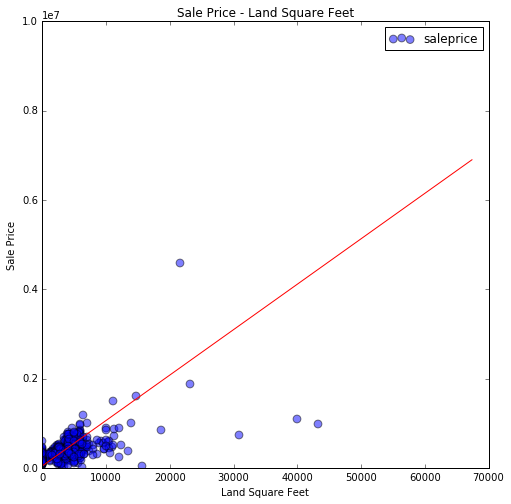

In [64]:
#plot and line fitting

pl.figure(figsize=(8,8))
x= correlation.land_sq_feet
y= correlation.saleprice
pl.scatter(x, y,s=60, c = 'blue', alpha=0.5)

x0 = pd.DataFrame({'land_sq_feet':np.linspace(np.min(correlation['land_sq_feet']), np.max(correlation['land_sq_feet']))})
p0 = model.predict(x0)
pl.plot(x0, p0, c='red')

# give plot a title
pl.title('Sale Price - Land Square Feet')
# make axis labels
pl.xlabel('Land Square Feet')
pl.ylabel('Sale Price')

pl.legend( loc=1, fontsize = 12)

pl.xlim(0, 70000)
pl.ylim(0, 10000000)


In [32]:
#function sale price and gross square feet

model1 = smf.ols(formula='saleprice ~ gross_sq_feet', data = correlation).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     5568.
Date:                Sun, 13 Dec 2015   Prob (F-statistic):          1.35e-287
Time:                        14:45:06   Log-Likelihood:                -7433.7
No. Observations:                 545   AIC:                         1.487e+04
Df Residuals:                     543   BIC:                         1.488e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2.527e+05   9049.740     27.926

(0, 6000000)

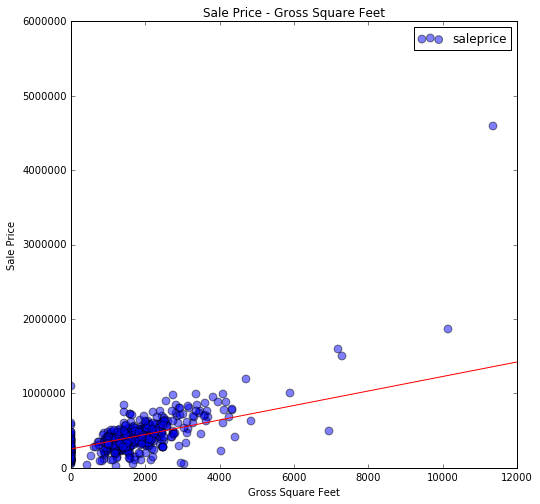

In [53]:
#this is for plot

pl.figure(figsize=(8,8))
x= correlation.gross_sq_feet
y= correlation.saleprice
pl.scatter(x, y,s=60, c = 'blue', alpha=0.5)

x0 = pd.DataFrame({'gross_sq_feet':np.linspace(np.min(correlation['gross_sq_feet']), np.max(correlation['gross_sq_feet']))})
p0 = model1.predict(x0)
pl.plot(x0, p0, c='red')

# give plot a title
pl.title('Sale Price - Gross Square Feet')
# make axis labels
pl.xlabel('Gross Square Feet')
pl.ylabel('Sale Price')

pl.legend( loc=1, fontsize = 12)

pl.xlim(0, 12000)
pl.ylim(0, 6000000)

In [45]:
#distance and sale price regression 
model2 = smf.ols(formula='saleprice ~ distance100', data = correlation).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.889
Date:                Sun, 13 Dec 2015   Prob (F-statistic):             0.0491
Time:                        14:49:24   Log-Likelihood:                -8091.4
No. Observations:                 545   AIC:                         1.619e+04
Df Residuals:                     543   BIC:                         1.620e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    3.215e+05   6.49e+04      4.950      

(0, 5000000)

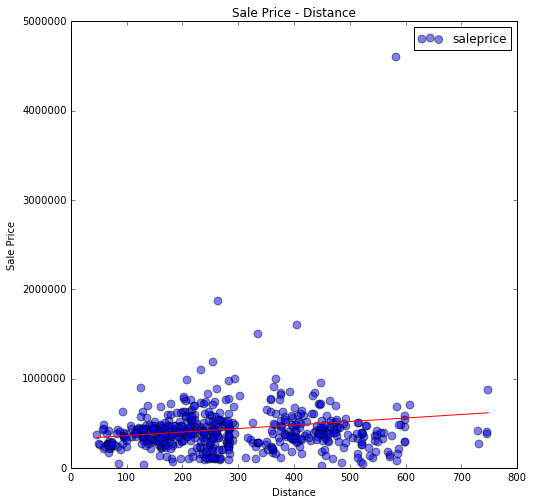

In [56]:
#plot fitting line

pl.figure(figsize=(8,8))
x= correlation.distance100
y= correlation.saleprice
pl.scatter(x, y,s=60, c = 'blue', alpha=0.5)

x0 = pd.DataFrame({'distance100':np.linspace(np.min(correlation['distance100']), np.max(correlation['distance100']))})
p0 = model2.predict(x0)
pl.plot(x0, p0, c='red')

# give plot a title
pl.title('Sale Price - Distance')
# make axis labels
pl.xlabel('Distance')
pl.ylabel('Sale Price')

pl.legend( loc=1, fontsize = 12)

pl.xlim(0, 800)
pl.ylim(0, 5000000)